# Problem Statement:

Customer churn is when a company’s customers stop doing business with that company. Businesses are very keen on measuring churn because keeping an existing customer is far less expensive than acquiring a new customer. New business involves working leads through a sales funnel, using marketing and sales budgets to gain additional customers. Existing customers will often have a higher volume of service consumption and can generate additional customer referrals.

Customer retention can be achieved with good customer service and products. But the most effective way for a company to prevent attrition of customers is to truly know them. The vast volumes of data collected about customers can be used to build churn prediction models. Knowing who is most likely to defect means that a company can prioritise focused marketing efforts on that subset of their customer base.

Preventing customer churn is critically important to the telecommunications sector, as the barriers to entry for switching services are so low. 

# Customer Churn Analysis

Customer churn analysis refers to the customer attrition rate in a company. This analysis helps SaaS companies identify the cause of the churn and implement effective strategies for retention. Gathers available customer behavior, transactions, demographics data and usage pattern.

Churn analysis is the evaluation of a company’s customer loss rate in order to reduce it. Also referred to as customer attrition rate, churn can be minimized by assessing your product and how people use it.

Customer churn (also known as customer attrition) refers to when a customer (player, subscriber, user, etc.) ceases his or her relationship with a company. Online businesses typically treat a customer as churned once a particular amount of time has elapsed since the customer’s last interaction with the site or service. The full cost of churn includes both lost revenue and the marketing costs involved with replacing those customers with new ones. Reducing churn is a key business goal of every online business.

# Importing the Libraries

In [1]:
# data processing
import pandas as pd

# linear algebra
import numpy as np

# matplotlib inline
import matplotlib.pyplot as plt

# data visualisation
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

# Algorithms
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier

# Getting the Data

In [2]:
df=pd.read_csv("Telecom_customer_churn.csv")

In [3]:
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [4]:
df.shape

(7043, 21)

we have 7043 rows and 21 columns in this dataset.

In [5]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

we have 20 features and 1 target variable in this dataset.

In [6]:
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

We have int types,object types and float types of values which are independent variable and the Churn is our target variable in this dataset.

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


There are 7053 samples in these dataset. There are both categorical and numerical columns in the dataset. There are no null values in this dataset.

In [8]:
# More information about the data can be gathered by using
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


There are 7053 samples in these dataset. There are both categorical and numerical columns in the dataset. There are no null values in this dataset.
Target variable is not see in describe function and other some variables are not see in this table. Variables that do not appear in this table are object type. They have to be converted to int type.

In [9]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

There is no missing values in this dataset.

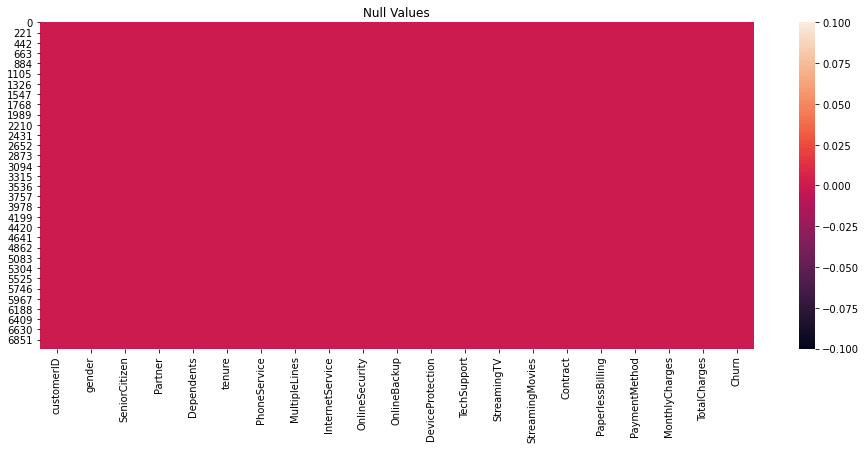

In [10]:
plt.figure(figsize=[16,6])
sns.heatmap(df.isnull())
plt.title("Null Values")
plt.show()

no missing values in this plot.

In [11]:
df["Churn"].unique()

array(['No', 'Yes'], dtype=object)

There are two unique values in df["Churn"].

In [12]:
df.Churn.value_counts()

No     5174
Yes    1869
Name: Churn, dtype: int64

No column has most values as compared to Yes column. No column has 5174 values and Yes column has 1869 values in this dataset.

# label encoder

Label Encoding is a popular encoding technique for handling categorical variables. In this technique, each label is assigned a unique integer based on alphabetical ordering. Let's see how to implement label encoding in Python using the scikit-learn library and also understand the challenges with label encoding.

In [13]:
from sklearn.preprocessing import LabelEncoder
LE=LabelEncoder()

In [14]:
df["customerID"]=LE.fit_transform(df["customerID"])
df["customerID"].unique()

array([5375, 3962, 2564, ..., 3367, 5934, 2226])

In [15]:
df["gender"]=LE.fit_transform(df["gender"])
df["gender"].unique()

array([0, 1])

In [16]:
df["Partner"]=LE.fit_transform(df["Partner"])
df["Partner"].unique()

array([1, 0])

In [17]:
df["Dependents"]=LE.fit_transform(df["Dependents"])
df["Dependents"].unique()

array([0, 1])

In [18]:
df["PhoneService"]=LE.fit_transform(df["PhoneService"])
df["PhoneService"].unique()

array([0, 1])

In [19]:
df["MultipleLines"]=LE.fit_transform(df["MultipleLines"])
df["MultipleLines"].unique()

array([1, 0, 2])

In [20]:
df["InternetService"]=LE.fit_transform(df["InternetService"])
df["InternetService"].unique()

array([0, 1, 2])

In [21]:
df["OnlineSecurity"]=LE.fit_transform(df["OnlineSecurity"])
df["OnlineSecurity"].unique()

array([0, 2, 1])

In [22]:
df["OnlineBackup"]=LE.fit_transform(df["OnlineBackup"])
df["OnlineBackup"].unique()

array([2, 0, 1])

In [23]:
df["DeviceProtection"]=LE.fit_transform(df["DeviceProtection"])
df["DeviceProtection"].unique()

array([0, 2, 1])

In [24]:
df["TechSupport"]=LE.fit_transform(df["TechSupport"])
df["TechSupport"].unique()

array([0, 2, 1])

In [25]:
df["StreamingTV"]=LE.fit_transform(df["StreamingTV"])
df["StreamingTV"].unique()

array([0, 2, 1])

In [26]:
df["StreamingMovies"]=LE.fit_transform(df["StreamingMovies"])
df["StreamingMovies"].unique()

array([0, 2, 1])

In [27]:
df["Contract"]=LE.fit_transform(df["Contract"])
df["Contract"].unique()

array([0, 1, 2])

In [28]:
df["PaperlessBilling"]=LE.fit_transform(df["PaperlessBilling"])
df["PaperlessBilling"].unique()

array([1, 0])

In [29]:
df["PaymentMethod"]=LE.fit_transform(df["PaymentMethod"])
df["PaymentMethod"].unique()

array([2, 3, 0, 1])

In [30]:
df["TotalCharges"]=LE.fit_transform(df["TotalCharges"])
df["TotalCharges"].unique()

array([2505, 1466,  157, ..., 2994, 2660, 5407])

In [31]:
df["Churn"]=LE.fit_transform(df["Churn"])
df["Churn"].unique()

array([0, 1])

There are 18 columns is object types variable . Using Label encoder these 18 columns is converting into int type.

# EDA

will use countplot from the seaborn package.

<AxesSubplot:xlabel='Churn', ylabel='count'>

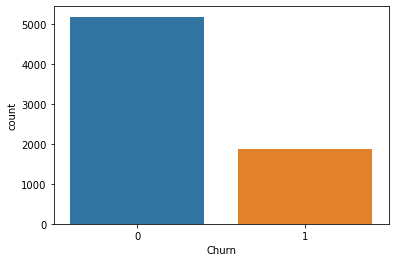

In [32]:
sns.countplot(df["Churn"])

There is class imbalance issue exists.

array([[<AxesSubplot:title={'center':'customerID'}>,
        <AxesSubplot:title={'center':'gender'}>,
        <AxesSubplot:title={'center':'SeniorCitizen'}>,
        <AxesSubplot:title={'center':'Partner'}>,
        <AxesSubplot:title={'center':'Dependents'}>],
       [<AxesSubplot:title={'center':'tenure'}>,
        <AxesSubplot:title={'center':'PhoneService'}>,
        <AxesSubplot:title={'center':'MultipleLines'}>,
        <AxesSubplot:title={'center':'InternetService'}>,
        <AxesSubplot:title={'center':'OnlineSecurity'}>],
       [<AxesSubplot:title={'center':'OnlineBackup'}>,
        <AxesSubplot:title={'center':'DeviceProtection'}>,
        <AxesSubplot:title={'center':'TechSupport'}>,
        <AxesSubplot:title={'center':'StreamingTV'}>,
        <AxesSubplot:title={'center':'StreamingMovies'}>],
       [<AxesSubplot:title={'center':'Contract'}>,
        <AxesSubplot:title={'center':'PaperlessBilling'}>,
        <AxesSubplot:title={'center':'PaymentMethod'}>,
        <AxesSu

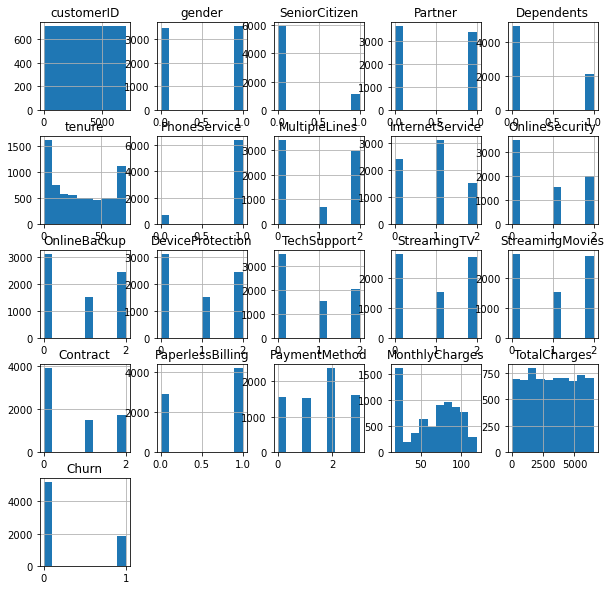

In [33]:
df.hist(figsize=(10,10))

None of the df dataset have missing values. The values are on different scales. Many machine learning models require the values to be on the same scale. We will use StandardScaler from the sklearn library to scale the features.

<AxesSubplot:xlabel='count', ylabel='customerID'>

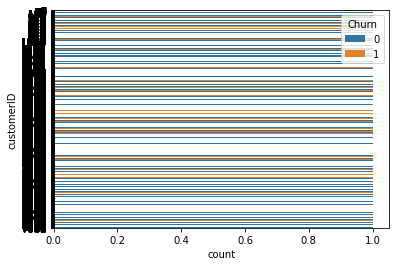

In [39]:
sns.countplot(y='customerID', hue='Churn', data = df)

In Customer_Churn dataset has no missing values.In this plot is showing CustomerID of the dataset.

<AxesSubplot:xlabel='count', ylabel='SeniorCitizen'>

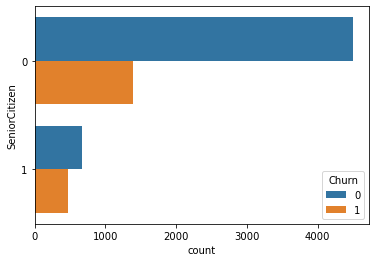

In [40]:
sns.countplot(y='SeniorCitizen', hue='Churn', data = df)

In Customer_Churn dataset has no missing values.In this plot is showing SeniorCitizen of the dataset.

<AxesSubplot:xlabel='count', ylabel='tenure'>

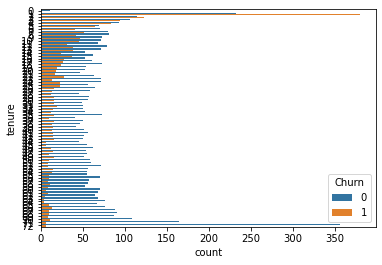

In [41]:
sns.countplot(y='tenure', hue='Churn', data = df)

In Customer_Churn dataset has no missing values.In this plot is showing tenure of the dataset.

<AxesSubplot:xlabel='count', ylabel='Partner'>

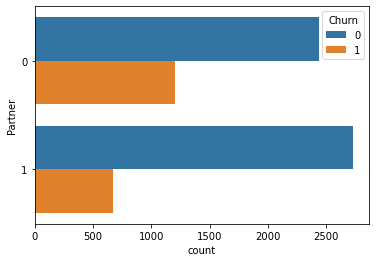

In [42]:
sns.countplot(y='Partner', hue='Churn', data = df)

In Customer_Churn dataset has no missing values.In this plot is showing Partner of the dataset.

<AxesSubplot:xlabel='count', ylabel='PhoneService'>

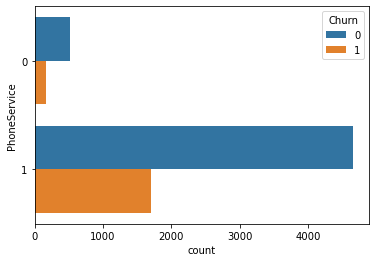

In [43]:
sns.countplot(y='PhoneService', hue='Churn', data = df)

In Customer_Churn dataset has no missing values.In this plot is showing PhoneService of the dataset.

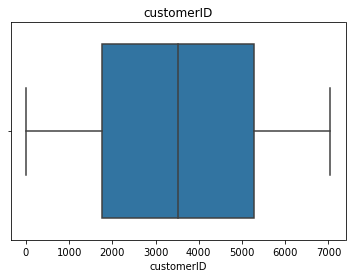

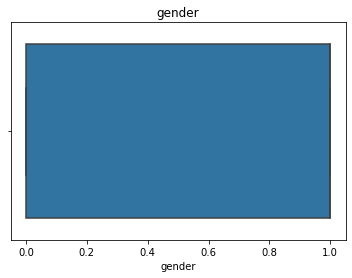

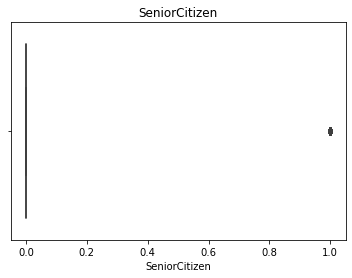

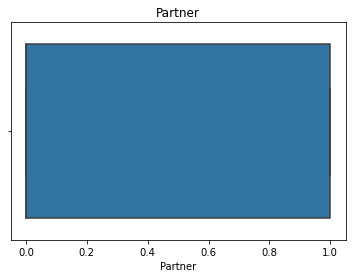

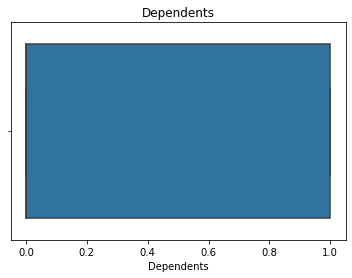

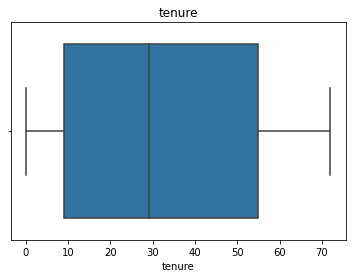

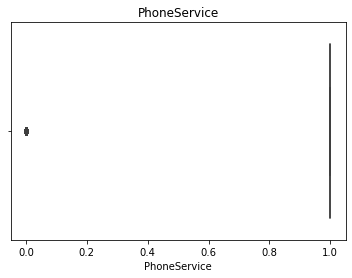

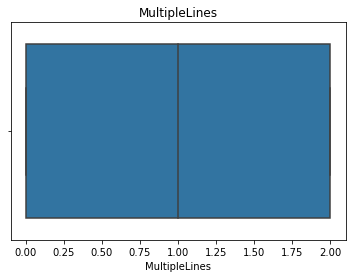

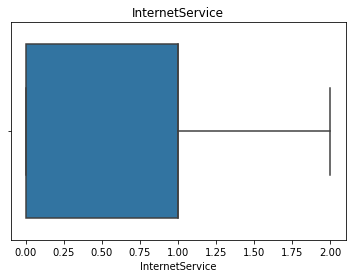

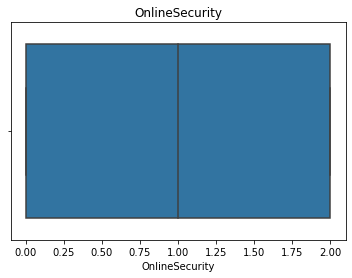

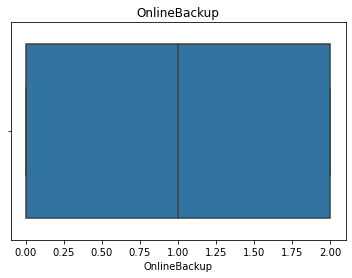

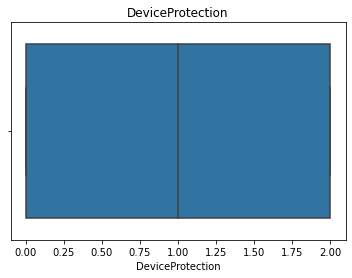

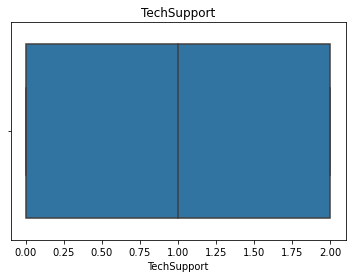

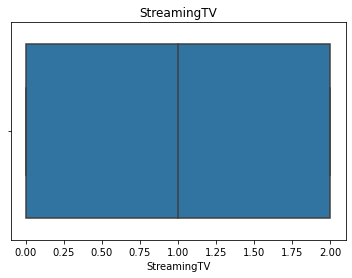

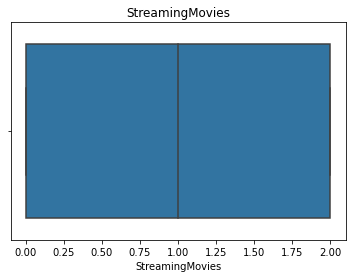

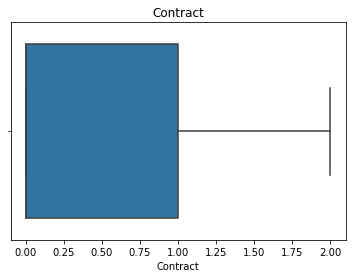

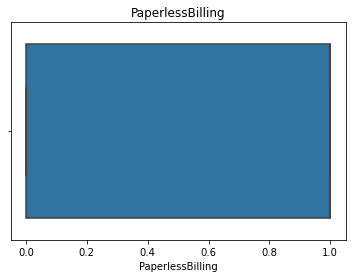

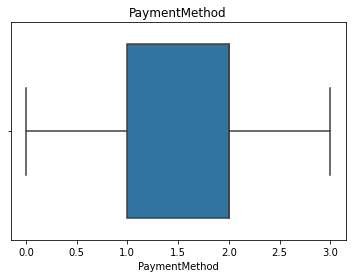

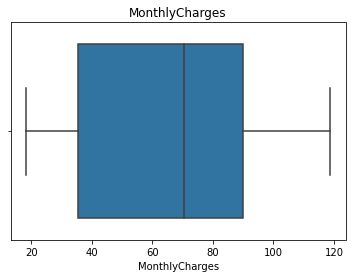

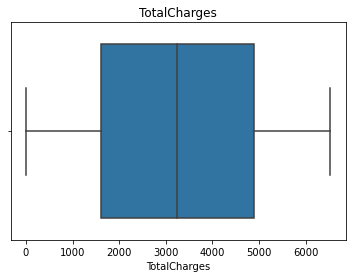

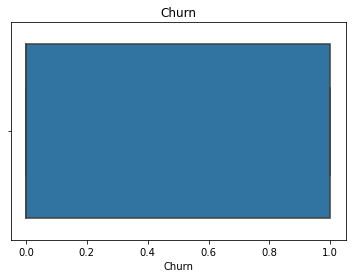

In [44]:
for col in ['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn']:
    sns.boxplot(df[col].dropna(),orient='v')
    plt.title(col)
    plt.show()

A box and whisker plot is a way of summarizing a set of data measured on an interval scale. It is often used in explanatory data analysis. This type of graph is used to show the shape of the distribution, its central value, and its variability.

In this plot only two columns has outliers are present.SeniorCitizen and PhoneService thses two columns has outliers are present. rest of the columns has  no outliers are present.

# Distribution plot (Dist plot)

distplot() function is used to plot the distplot. The distplot represents the univariate distribution of data i.e. data distribution of a variable against the density distribution. The seaborn distplot() function accepts the data variable as an argument and returns the plot with the density distribution.

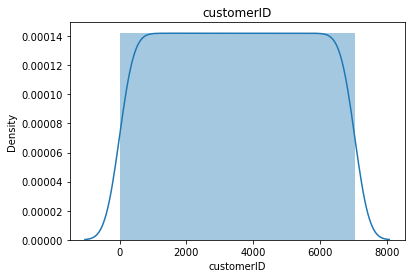

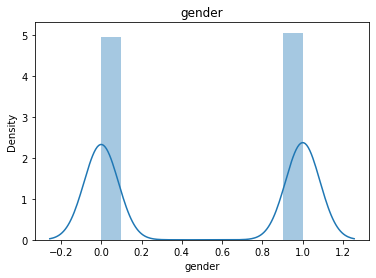

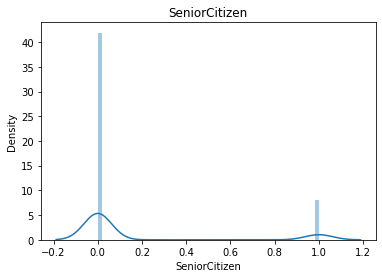

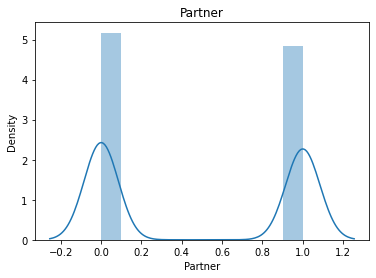

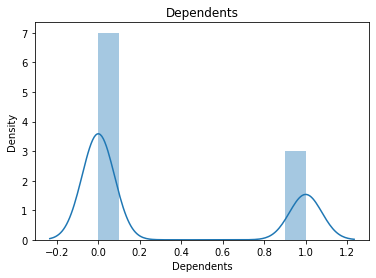

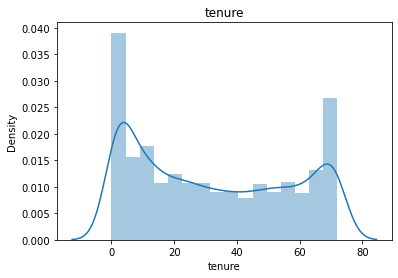

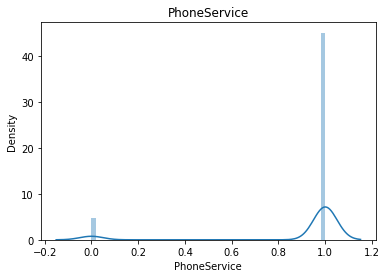

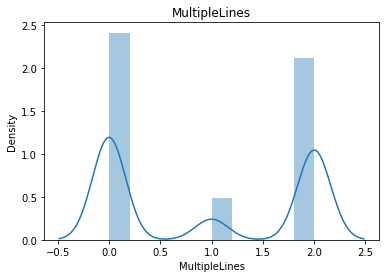

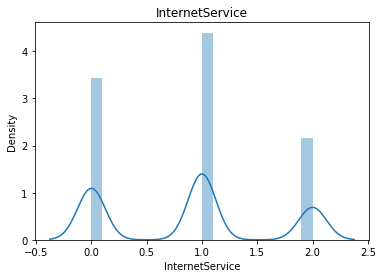

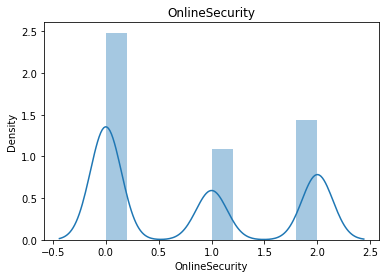

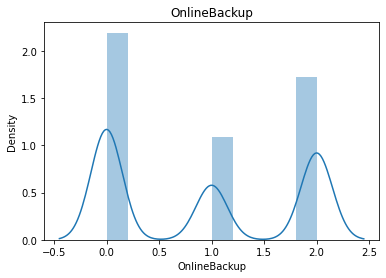

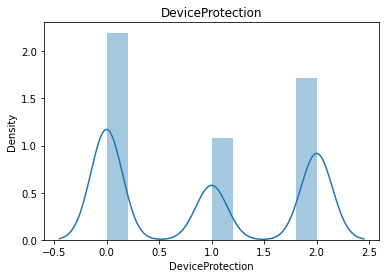

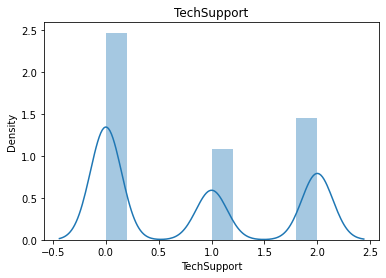

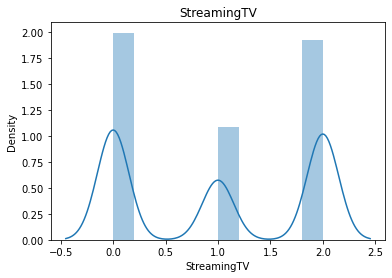

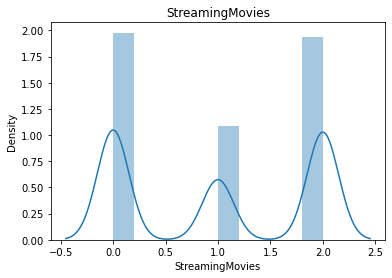

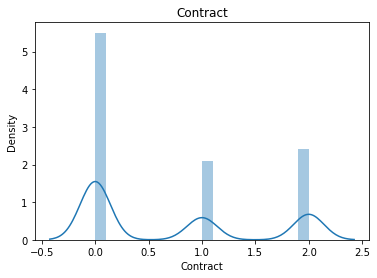

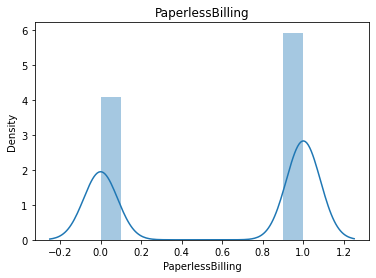

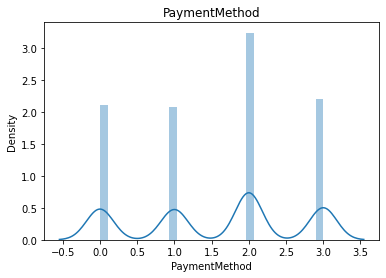

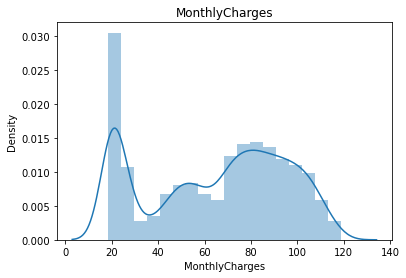

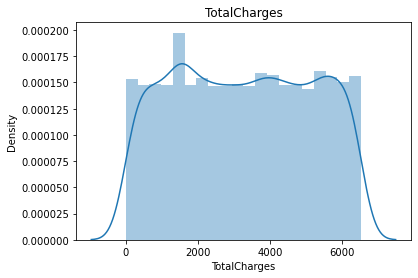

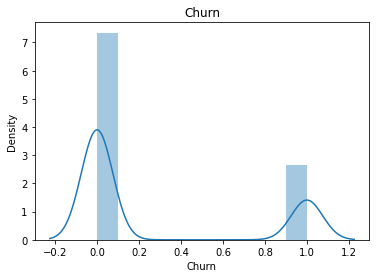

In [46]:
for col in ['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn']:
    sns.distplot(df[col].dropna())
    plt.title(col)
    plt.show()

In customer_churn dataset gender, SeniorCitizen, Partner, Dependents,tenure, PhoneService, MultipleLines, InternetService,OnlineSecurity, OnlineBackup, DeviceProtection, TechSupport,
StreamingTV, StreamingMovies, Contract, PaperlessBilling, PaymentMethod, MonthlyCharges, TotalCharges, Churn 
these column has Data is not normally distributed.

# Bar plot

Bar graph (bar chart) is a graph that represents the categorical data using rectangular bars. The bar graph shows the comparison between discrete categories. The bar graph is used to compare the items between different groups over time. Bar graphs are used to measure the changes over a period of time. When the changes are larger, a bar graph is the best option to represent the data.

<AxesSubplot:xlabel='gender', ylabel='Churn'>

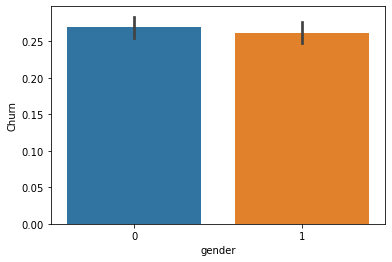

In [47]:
sns.barplot(x='gender', y='Churn', data=df)

in given plot 0 column has most income showing. The lowest income is shown in 1 column.

<AxesSubplot:xlabel='SeniorCitizen', ylabel='Churn'>

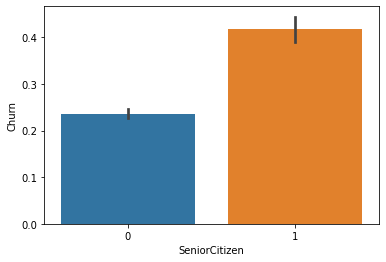

In [50]:
sns.barplot(x='SeniorCitizen', y='Churn', data=df)

In this plot shows 0 column is the lowest and the 1 column is highest values .

<AxesSubplot:xlabel='Partner', ylabel='Churn'>

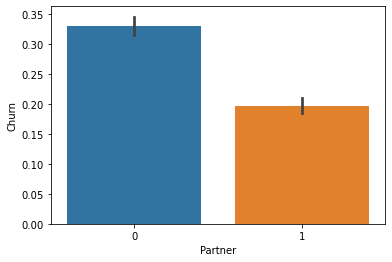

In [51]:
sns.barplot(x='Partner', y='Churn', data=df)

In given plot shows 0 column has most values present .

<AxesSubplot:xlabel='PhoneService', ylabel='Churn'>

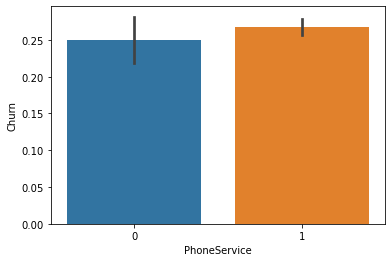

In [52]:
sns.barplot(x='PhoneService', y='Churn', data=df)

In this plot shows 1  column has most values present.

<AxesSubplot:xlabel='PaymentMethod', ylabel='Churn'>

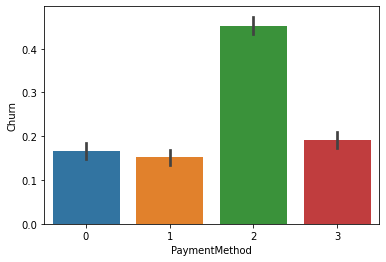

In [54]:
sns.barplot(x='PaymentMethod', y='Churn', data=df)

In this plot showing 2 column has most values present and 1 column is the lowest values present.

# Bivariate analysis

Comparing multiple variables simultaneously is also another useful way to understand your data. When you have two continuous variables, a scatter plot is usually used. You can use a boxplot to compare one continuous and one categorical variable.

Scatter plots primary uses are to observe and show relationships between two numeric variables. The dots in a scatter plot not only report the values of individual data points, but also patterns when the data are taken as a whole. A scatter plot can also be useful for identifying other patterns in data.

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


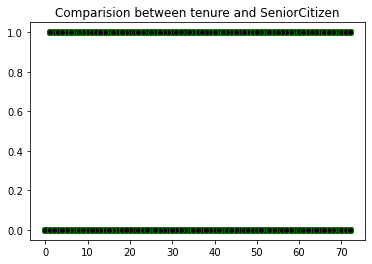

In [55]:
plt.scatter(df["tenure"],df["SeniorCitizen"],alpha=0.8,c=(0,0,0),edgecolors='g')
plt.title("Comparision between tenure and SeniorCitizen")
plt.show()

no outliers are present in this plot.

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


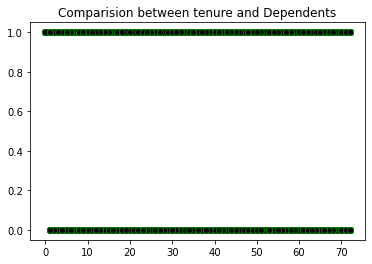

In [56]:
plt.scatter(df["tenure"],df["Dependents"],alpha=0.8,c=(0,0,0),edgecolors='g')
plt.title("Comparision between tenure and Dependents")
plt.show()

No outliers are present.

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


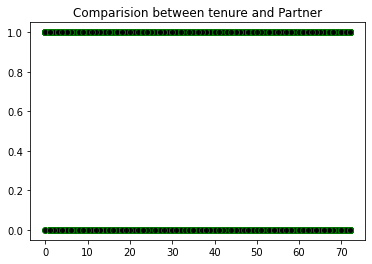

In [57]:
plt.scatter(df["tenure"],df["Partner"],alpha=0.8,c=(0,0,0),edgecolors='g')
plt.title("Comparision between tenure and Partner")
plt.show()

No outliers are present.

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


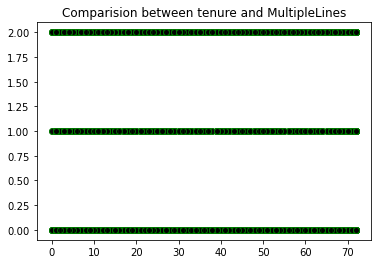

In [58]:
plt.scatter(df["tenure"],df["MultipleLines"],alpha=0.8,c=(0,0,0),edgecolors='g')
plt.title("Comparision between tenure and MultipleLines")
plt.show()

 No outliers are present in this plot.

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


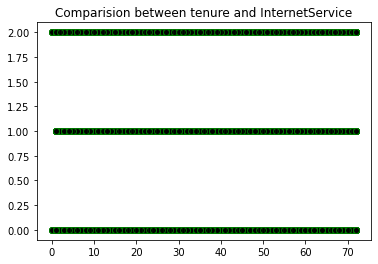

In [59]:
plt.scatter(df["tenure"],df["InternetService"],alpha=0.8,c=(0,0,0),edgecolors='g')
plt.title("Comparision between tenure and InternetService")
plt.show()

No outliers are present in this plot.

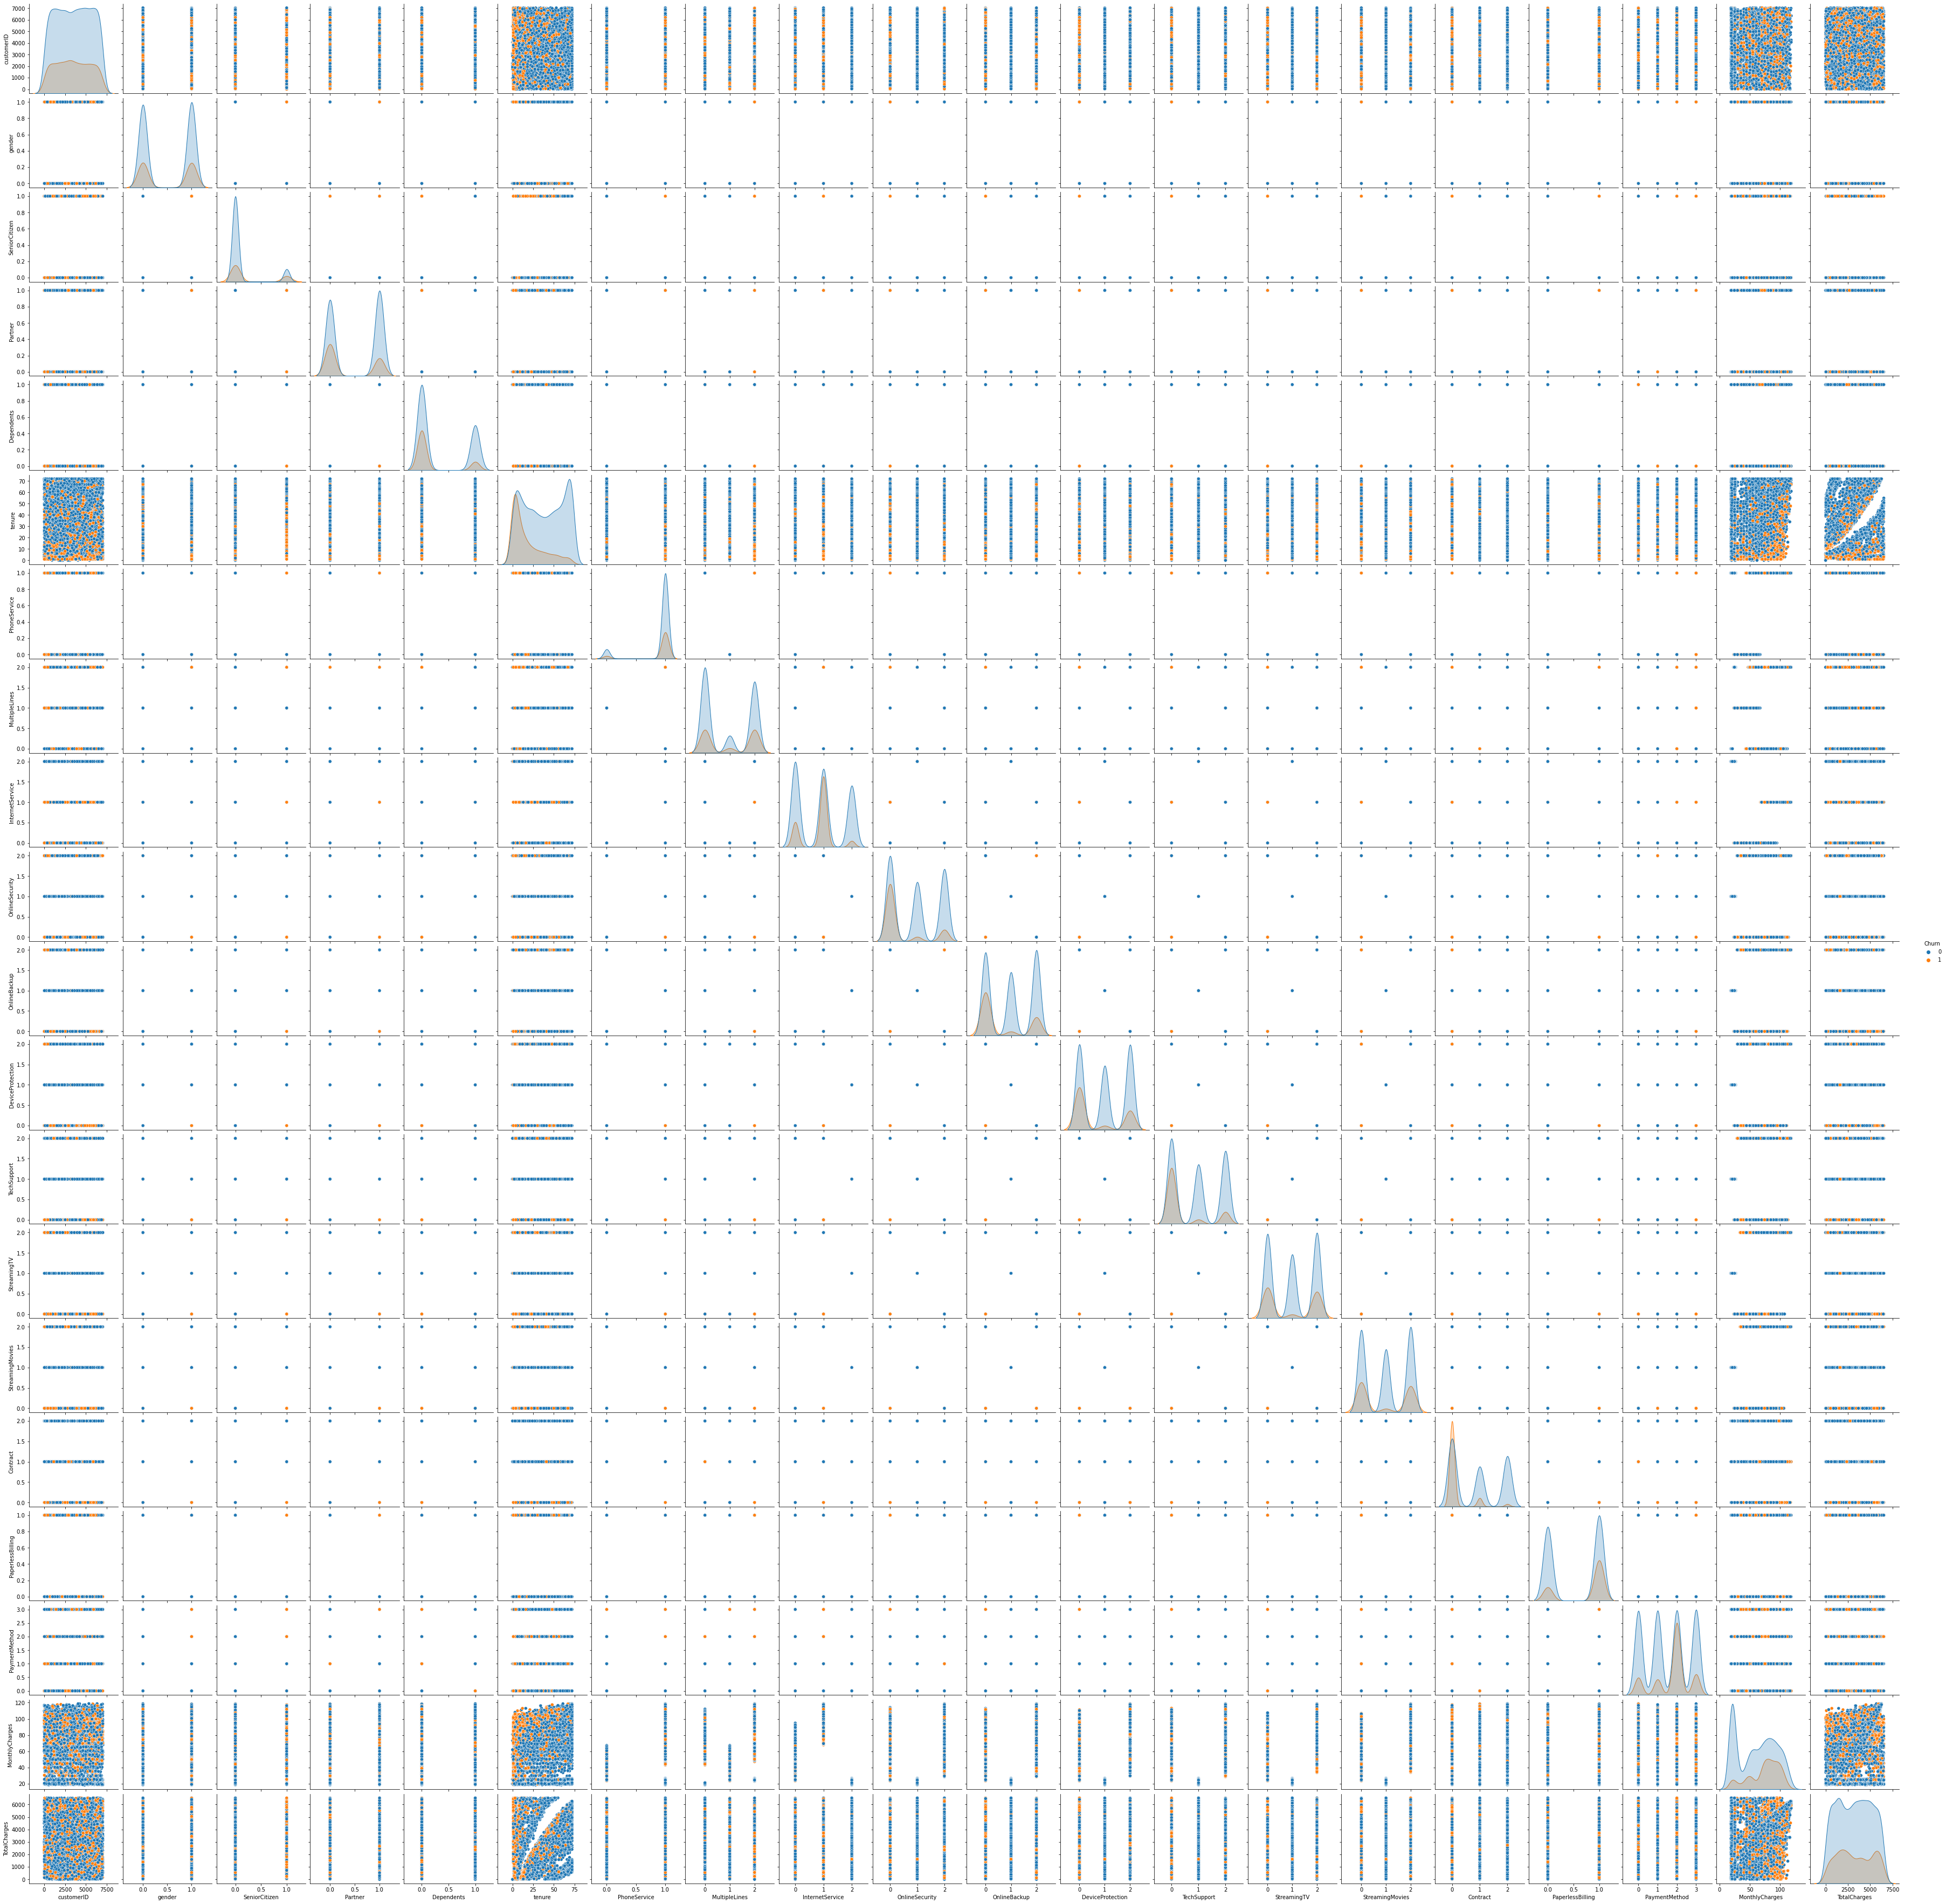

In [60]:
sns.pairplot(df,hue="Churn")

We can check the corelation between dependent and independent features using dataframe.corr() function. This plot pairwise relationships in a dataset.
Pair plot is used to understand the best set of features to explain a relationship between two variables or to form the most separated clusters. It also helps to form some simple classification models by drawing some simple lines or make linear separation in our data-set.

# Checking Correlation

In [61]:
cor=df.corr()
cor

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
customerID,1.000000,0.006288,-0.002074,-0.026729,-0.012823,0.008035,-0.006483,0.004316,-0.012407,0.013292,...,-0.006918,0.001140,-0.007777,-0.016746,0.015028,-0.001945,0.011604,-0.003916,0.003027,-0.017447
gender,0.006288,1.000000,-0.001874,-0.001808,0.010517,0.005106,-0.006488,-0.006739,-0.000863,-0.015017,...,0.000549,-0.006825,-0.006421,-0.008743,0.000126,-0.011754,0.017352,-0.014569,-0.005291,-0.008612
SeniorCitizen,-0.002074,-0.001874,1.000000,0.016479,-0.211185,0.016567,0.008576,0.146185,-0.032310,-0.128221,...,-0.021398,-0.151268,0.030776,0.047266,-0.142554,0.156530,-0.038551,0.220173,0.037653,0.150889
Partner,-0.026729,-0.001808,0.016479,1.000000,0.452676,0.379697,0.017706,0.142410,0.000891,0.150828,...,0.166330,0.126733,0.137341,0.129574,0.294806,-0.014877,-0.154798,0.096848,0.059568,-0.150448
Dependents,-0.012823,0.010517,-0.211185,0.452676,1.000000,0.159712,-0.001762,-0.024991,0.044590,0.152166,...,0.080537,0.133524,0.046885,0.021321,0.243187,-0.111377,-0.040292,-0.113890,-0.009572,-0.164221
tenure,0.008035,0.005106,0.016567,0.379697,0.159712,1.000000,0.008448,0.343032,-0.030359,0.325468,...,0.371105,0.322942,0.289373,0.296866,0.671607,0.006152,-0.370436,0.247900,0.158523,-0.352229
PhoneService,-0.006483,-0.006488,0.008576,0.017706,-0.001762,0.008448,1.000000,-0.020538,0.387436,-0.015198,...,0.003727,-0.019158,0.055353,0.043870,0.002247,0.016505,-0.004184,0.247398,0.083195,0.011942
MultipleLines,0.004316,-0.006739,0.146185,0.142410,-0.024991,0.343032,-0.020538,1.000000,-0.109216,0.007141,...,0.122318,0.011466,0.175059,0.180957,0.110842,0.165146,-0.176793,0.433576,0.114955,0.038037
InternetService,-0.012407,-0.000863,-0.032310,0.000891,0.044590,-0.030359,0.387436,-0.109216,1.000000,-0.028416,...,0.044944,-0.026047,0.107417,0.098350,0.099721,-0.138625,0.086140,-0.323260,-0.055724,-0.047291
OnlineSecurity,0.013292,-0.015017,-0.128221,0.150828,0.152166,0.325468,-0.015198,0.007141,-0.028416,1.000000,...,0.175985,0.285028,0.044669,0.055954,0.374416,-0.157641,-0.096726,-0.053878,0.042357,-0.289309


This column is checking correlation between different different columns.

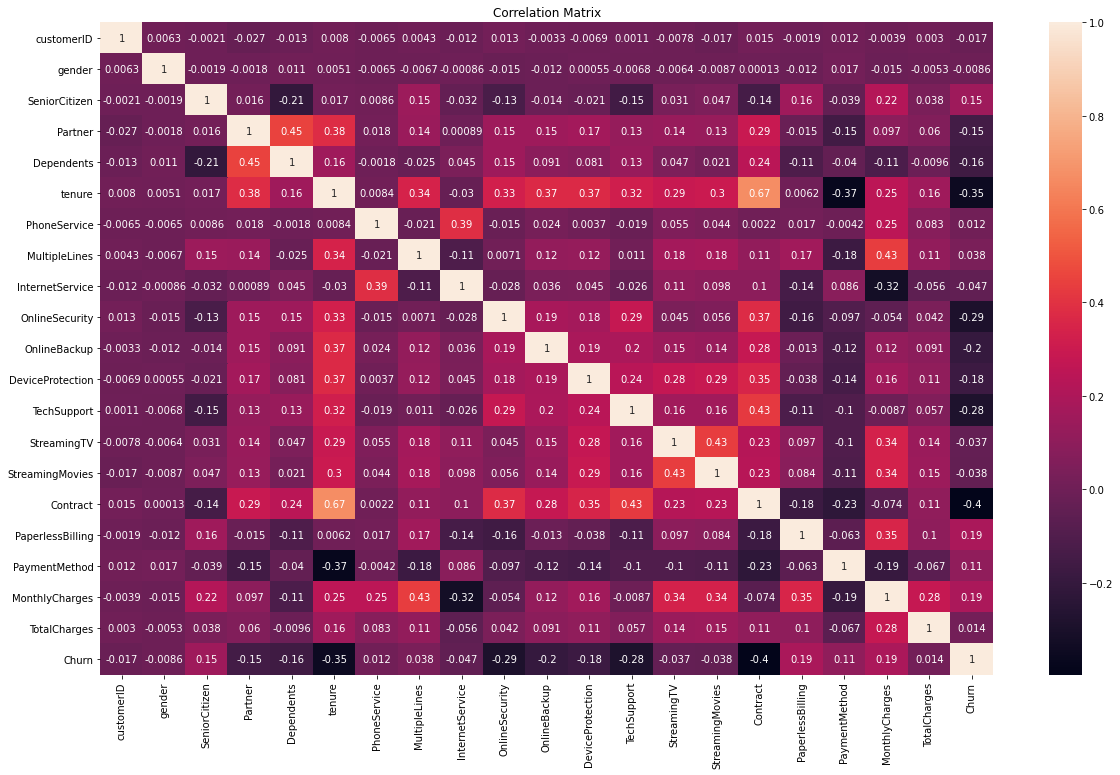

In [62]:
plt.figure(figsize=[20,12])
sns.heatmap(cor,annot=True)
plt.title("Correlation Matrix")
plt.show()

I am using seaborn heatmap to plot the correlated matrix and plot the corr value in the heatmap graph.Light shades are highly correlated between columns.
light shades are correlated between columns.
tenure & contract (0.67)

# Correlation Metrix

Correlation Matrix is basically a covariance matrix. Also known as the auto-covariance matrix, dispersion matrix, variance matrix, or variance-covariance matrix. It is a matrix in which i-j position defines the correlation between the ith and jth parameter of the given data-set.

When the data points follow a roughly straight-line trend, the variables are said to have an approximately linear relationship. In some cases, the data points fall close to a straight line, but more often there is quite a bit of variability of the points around the straight-line trend.

In [63]:
corr_matrix=df.corr()
corr_matrix["Churn"].sort_values(ascending=False)

Churn               1.000000
MonthlyCharges      0.193356
PaperlessBilling    0.191825
SeniorCitizen       0.150889
PaymentMethod       0.107062
MultipleLines       0.038037
TotalCharges        0.014479
PhoneService        0.011942
gender             -0.008612
customerID         -0.017447
StreamingTV        -0.036581
StreamingMovies    -0.038492
InternetService    -0.047291
Partner            -0.150448
Dependents         -0.164221
DeviceProtection   -0.178134
OnlineBackup       -0.195525
TechSupport        -0.282492
OnlineSecurity     -0.289309
tenure             -0.352229
Contract           -0.396713
Name: Churn, dtype: float64

I am finding the correlation value of each column. Their are identify the corrlation of independent variable with target variable "Churn".

# Outlier Removal

Sometimes a dataset can contain extreme values that are outside the range of what is expected and unlike the other data. These are called outliers and often machine learning modeling and model skill in general can be improved by understanding and even removing these outlier values.

In [65]:
from scipy.stats import zscore
z=np.abs(zscore(df))

new_df=df[(z<4).all(axis=1)]

In [66]:
new_df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,5375,0,0,1,0,1,0,1,0,0,...,0,0,0,0,0,1,2,29.85,2505,0
1,3962,1,0,0,0,34,1,0,0,2,...,2,0,0,0,1,0,3,56.95,1466,0
2,2564,1,0,0,0,2,1,0,0,2,...,0,0,0,0,0,1,3,53.85,157,1
3,5535,1,0,0,0,45,0,1,0,2,...,2,2,0,0,1,0,0,42.30,1400,0
4,6511,0,0,0,0,2,1,0,1,0,...,0,0,0,0,0,1,2,70.70,925,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,4853,1,0,1,1,24,1,2,0,2,...,2,2,2,2,1,1,3,84.80,1597,0
7039,1525,0,0,1,1,72,1,2,1,0,...,2,0,2,2,1,1,1,103.20,5698,0
7040,3367,0,0,1,1,11,0,1,0,2,...,0,0,0,0,0,1,2,29.60,2994,0
7041,5934,1,1,1,0,4,1,2,1,0,...,0,0,0,0,0,1,3,74.40,2660,1


In [67]:
new_df.shape

(7043, 21)

In [68]:
df.shape

(7043, 21)

In [69]:
(0/7043)*100

0.0

outliers has been removed.

# skewness

In [70]:
x=df.drop("Churn",axis=1)
y=df["Churn"]

In [71]:
x.skew()

customerID          0.000000
gender             -0.019031
SeniorCitizen       1.833633
Partner             0.067922
Dependents          0.875199
tenure              0.239540
PhoneService       -2.727153
MultipleLines       0.118719
InternetService     0.205423
OnlineSecurity      0.416985
OnlineBackup        0.182930
DeviceProtection    0.186847
TechSupport         0.402365
StreamingTV         0.028486
StreamingMovies     0.014657
Contract            0.630959
PaperlessBilling   -0.375396
PaymentMethod      -0.170129
MonthlyCharges     -0.220524
TotalCharges        0.015857
dtype: float64

In [72]:
from sklearn.preprocessing import power_transform
new_df=power_transform(x)

new_df=pd.DataFrame(new_df,columns=x.columns)

In [74]:
new_df.skew()

customerID         -0.290930
gender             -0.019031
SeniorCitizen       1.833633
Partner             0.067922
Dependents          0.875199
tenure             -0.243325
PhoneService       -2.727153
MultipleLines       0.033697
InternetService    -0.072384
OnlineSecurity      0.149362
OnlineBackup       -0.001417
DeviceProtection    0.001051
TechSupport         0.139751
StreamingTV        -0.097211
StreamingMovies    -0.105641
Contract            0.302174
PaperlessBilling   -0.375396
PaymentMethod      -0.207559
MonthlyCharges     -0.259035
TotalCharges       -0.290854
dtype: float64

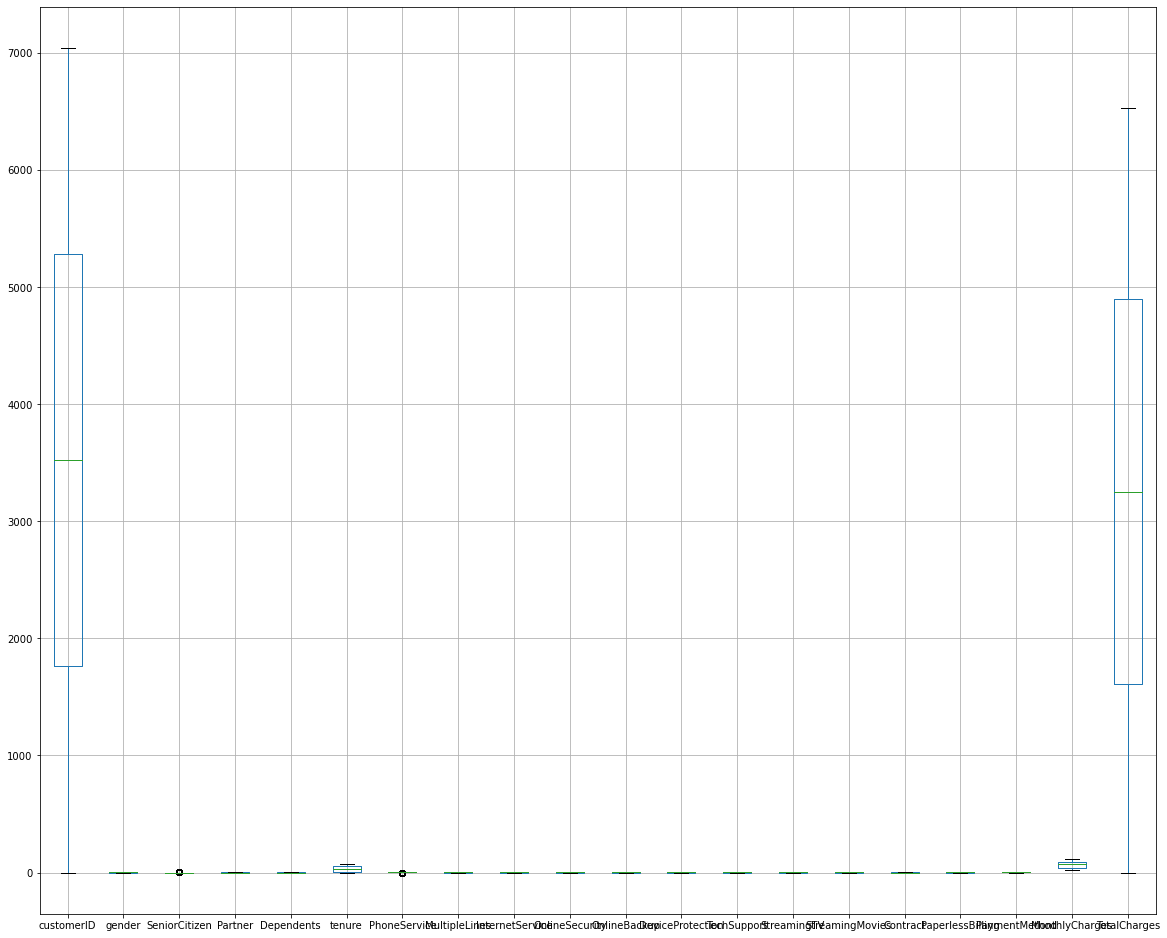

In [75]:
x.boxplot(figsize=[20,20])
plt.subplots_adjust(bottom=0.25)
plt.show()

In given plot shows no outliers are present in this dataset.

# Handling class imbalance problem by oversampling the minority class

Oversampling and undersampling in data analysis are techniques used to adjust the class distribution of a data set (i.e. the ratio between the different classes/categories represented). These terms are used both in statistical sampling, survey design methodology and in machine learning.

In [76]:
from imblearn.over_sampling import SMOTE
SM=SMOTE()
x_over,y_over=SM.fit_resample(x,y)

In [77]:
y_over.value_counts()

1    5174
0    5174
Name: Churn, dtype: int64

# Min Max scaler

In [78]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(x)
x = pd.DataFrame(scaler.transform(x))

In [79]:
x

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,0.763277,0.0,0.0,1.0,0.0,0.013889,0.0,0.5,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.666667,0.115423,0.383614
1,0.562624,1.0,0.0,0.0,0.0,0.472222,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.5,0.0,1.000000,0.385075,0.224502
2,0.364101,1.0,0.0,0.0,0.0,0.027778,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.000000,0.354229,0.024043
3,0.785998,1.0,0.0,0.0,0.0,0.625000,0.0,0.5,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.5,0.0,0.000000,0.239303,0.214395
4,0.924595,0.0,0.0,0.0,0.0,0.027778,1.0,0.0,0.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.666667,0.521891,0.141654
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0.689151,1.0,0.0,1.0,1.0,0.333333,1.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,0.5,1.0,1.000000,0.662189,0.244564
7039,0.216558,0.0,0.0,1.0,1.0,1.000000,1.0,1.0,0.5,0.0,1.0,1.0,0.0,1.0,1.0,0.5,1.0,0.333333,0.845274,0.872588
7040,0.478131,0.0,0.0,1.0,1.0,0.152778,0.0,0.5,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.666667,0.112935,0.458499
7041,0.842658,1.0,1.0,1.0,0.0,0.055556,1.0,1.0,0.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.000000,0.558706,0.407351


# finding best random_state

In [81]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.33,random_state=0)

# Random Forest:

In [83]:
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(x_train, y_train)

pred= random_forest.predict(x_test)

random_forest.score(x_train, y_train)
acc_random_forest = round(random_forest.score(x_train, y_train) * 100, 2)

# Logistic Regression:

In [84]:
# Running logistic regression model
logreg = LogisticRegression()
logreg.fit(x_train, y_train)

pred = logreg.predict(x_test)

acc_log = round(logreg.score(x_train, y_train) * 100, 2)

# SVC 

In [85]:
# Running SVC model
svc = SVC()
svc.fit(x_train, y_train)

pred = svc.predict(x_test)

acc_svc = round(svc.score(x_train, y_train) * 100, 2)

# K Nearest Neighbor:

In [86]:
# Running KNeighborsClassifier model
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(x_train, y_train) 

pred = knn.predict(x_test) 

acc_knn = round(knn.score(x_train, y_train) * 100, 2)

# AdaBoostClassifier:

In [87]:
ad=AdaBoostClassifier()
ad.fit(x_train,y_train)

pred = ad.predict(x_test)  

acc_ad = round(ad.score(x_train, y_train) * 100, 2)

# Decision Tree:

In [89]:
decision_tree = DecisionTreeClassifier()
decision_tree.fit(x_train, y_train) 

pred = decision_tree.predict(x_test)  

acc_decision_tree = round(decision_tree.score(x_train, y_train) * 100, 2)

# GradientBoostingClassifier model:

In [90]:
gbc=GradientBoostingClassifier()
gbc.fit(x_train,y_train)

pred = gbc.predict(x_test)  

acc_gbc = round(gbc.score(x_train, y_train) * 100, 2)

# Which is the best Model ?

In [93]:
results = pd.DataFrame({
    'Model': ['SVC', 'KNN',  
              'Random Forest',  'Decision Tree','AdaBoostClassifier',
              'LogisticRegression','GradientBoostingClassifier'],
               
    
    'Score': [acc_random_forest, acc_log, 
             acc_knn, acc_decision_tree,acc_ad,acc_gbc,acc_svc]})

result_df = results.sort_values(by='Score', ascending=False)
result_df = result_df.set_index('Score')
result_df

,Model
Score,
100.00,SVC
100.00,Decision Tree
86.12,Random Forest
83.62,LogisticRegression
82.85,GradientBoostingClassifier
81.07,AdaBoostClassifier
80.73,KNN


As we can see, the SVC  and Decision Tree goes on the first place. But first, let us check, how SVC and Decision Tree performs, when we use cross validation.

# Cross Validation

Cross-Validation also referred to as out of sampling technique is an essential element of a data science project. It is a resampling procedure used to evaluate machine learning models and access how the model will perform for an independent test dataset. There is always a need to validate the stability of your machine learning model.

Cross-validation is primarily used in applied machine learning to estimate the skill of a machine learning model on unseen data. That is, to use a limited sample in order to estimate how the model is expected to perform in general when used to make predictions on data not used during the training of the model.

In [94]:
from sklearn.model_selection import cross_val_score

In [95]:
print(cross_val_score(ad,x,y,cv=5).mean())

0.8003697819214143


In [96]:
print(cross_val_score(gbc,x,y,cv=5).mean())

0.8010796059423189


In [97]:
print(cross_val_score(knn,x,y,cv=5).mean())

0.7405933447319181


In [98]:
print(cross_val_score(random_forest,x,y,cv=5).mean())

0.7888699472546616


In [99]:
print(cross_val_score(logreg,x,y,cv=5).mean())

0.8040625604877734


In [100]:
print(cross_val_score(svc,x,y,cv=5).mean())

0.7978158873153107


In [101]:
print(cross_val_score(decision_tree,x,y,cv=5).mean())

0.7278155042260791


I checked the cross validation of each model here. The GradientBoosting Classifier has cross validation is 80% and LogisticRegression has cross validation is 81%.

# SVC

A support vector machine (SVM) is a supervised machine learning model that uses classification algorithms for two-group classification problems. After giving an SVM model sets of labeled training data for each category, they're able to categorize new text.

Support vector machines (SVMs) are a set of supervised learning methods used for classification, regression and outliers detection. The advantages of support vector machines are: Effective in high dimensional spaces. Still effective in cases where number of dimensions is greater than the number of samples.

# Feature Importance

Another great quality of ada boost is that they make it very easy to measure the relative importance of each feature. Sklearn measure a features importance by looking at how much the treee nodes, that use that feature, reduce impurity on average (across all trees in the forest). It computes this score automaticall for each feature after training and scales the results so that the sum of all importances is equal to 1. We will acces this below:

In [102]:
importances = pd.DataFrame({'feature':x_train.columns,'importance':np.round(ad.feature_importances_,3)})
importances = importances.sort_values('importance',ascending=False).set_index('feature')
importances.head(15)

,importance
feature,
18,0.28
5,0.20
0,0.12
15,0.12
19,0.08
9,0.04
17,0.04
7,0.02
12,0.02


<AxesSubplot:xlabel='feature'>

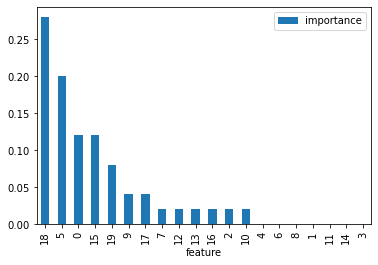

In [103]:
importances.plot.bar()

In this plot, showing how column is more importance in this dataset. Occupation column has more importance in this given plot.

# Training SVC again:

In [106]:
# 

dt = DecisionTreeClassifier()
dt.fit(x_train, y_train)
y_prediction = dt.predict(x_test)

dt.score(x_train, y_train)

acc_dt = round(dt.score(x_train, y_train) * 100, 2)
print(round(acc_dt,2,), "%")

100.0 %


# hyper parameter tuning

In machine learning, a hyperparameter is a parameter whose value is used to control the learning process. By contrast, the values of other parameters (typically node weights) are derived via training.

Hyperparameters can be classified as model hyperparameters, that cannot be inferred while fitting the machine to the training set because they refer to the model selection task, or algorithm hyperparameters, that in principle have no influence on the performance of the model but affect the speed and quality of the learning process. An example of a model hyperparameter is the topology and size of a neural network. Examples of algorithm hyperparameters are learning rate and mini-batch size.

In [107]:
from sklearn.model_selection import GridSearchCV
parameter = {'max_depth' : np.arange(2,10),
              'criterion':['gini','entropy']}

In [108]:
GCV=GridSearchCV(DecisionTreeClassifier(),parameter,cv=5)

In [109]:
GCV.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': array([2, 3, 4, 5, 6, 7, 8, 9])})

In [110]:
GCV.best_params_

{'criterion': 'gini', 'max_depth': 5}

In [111]:
GCV.best_score_

0.7831676761867102

In [112]:
ada=AdaBoostClassifier()
search_grid={'n_estimators':[500,1000,2000],
             'learning_rate':[.001,0.01,.1]}

In [113]:
search=GridSearchCV(estimator=ada,param_grid=search_grid,scoring='accuracy',n_jobs=1,cv=5)

In [114]:
search.fit(x,y)

GridSearchCV(cv=5, estimator=AdaBoostClassifier(), n_jobs=1,
             param_grid={'learning_rate': [0.001, 0.01, 0.1],
                         'n_estimators': [500, 1000, 2000]},
             scoring='accuracy')

In [115]:
search.best_params_

{'learning_rate': 0.01, 'n_estimators': 2000}

In [116]:
search.best_score_

0.8012210465191302

In [117]:
rfc=RandomForestClassifier(random_state=42)
param_grid = { 
    'n_estimators': [200, 500],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [4,5,6,7,8],
    'criterion' :['gini', 'entropy']}

In [118]:
CV_rfc = GridSearchCV(estimator=rfc, param_grid=param_grid, cv= 5)grid_params={ 'n_neighbors':[3,5,11,19],
            'weights': ['uniform','distance'],
            'metric':['éuclidean','manhattan']}

In [119]:
CV_rfc.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [4, 5, 6, 7, 8],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [200, 500]})

In [120]:
CV_rfc.best_params_

{'criterion': 'gini',
 'max_depth': 8,
 'max_features': 'auto',
 'n_estimators': 500}

In [121]:
CV_rfc.best_score_

0.8039434189478225

In [122]:
grid_params={ 'n_neighbors':[3,5,11,19],
            'weights': ['uniform','distance'],
            'metric':['éuclidean','manhattan']}

In [123]:
gs=GridSearchCV(knn,grid_params,verbose=1,cv=3,n_jobs=-1)

In [124]:
gs_result=gs.fit(x_train,y_train)

Fitting 3 folds for each of 16 candidates, totalling 48 fits


In [125]:
gs_result.best_score_

0.7738454582659995

In [126]:
gs_result.best_estimator_

KNeighborsClassifier(metric='manhattan', n_neighbors=19)

In [127]:
gs_result.best_params_

{'metric': 'manhattan', 'n_neighbors': 19, 'weights': 'uniform'}

In [128]:
parameters={
    "n_estimators":[5,50,250,500],
    "max_depth"   :[1,3,5,7,9],
    "learning_rate":[0.01,0.1,1,10,100]
}

In [129]:
gb=GridSearchCV(gbc,parameters,cv=5)
gb.fit(x_train,y_train.values.ravel())

GridSearchCV(cv=5, estimator=GradientBoostingClassifier(),
             param_grid={'learning_rate': [0.01, 0.1, 1, 10, 100],
                         'max_depth': [1, 3, 5, 7, 9],
                         'n_estimators': [5, 50, 250, 500]})

In [130]:
gb.best_params_

{'learning_rate': 0.1, 'max_depth': 1, 'n_estimators': 250}

In [131]:
gb.best_score_

0.8069068245951435

In [132]:
param_grid = {'C': [0.1, 1, 10, 100, 1000], 
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['rbf']} 
  
grid = GridSearchCV(SVC(), param_grid, refit = True, verbose = 3)

In [133]:
grid.fit(x_train, y_train)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END .....................C=0.1, gamma=1, kernel=rbf; total time=   2.9s
[CV 2/5] END .....................C=0.1, gamma=1, kernel=rbf; total time=   2.1s
[CV 3/5] END .....................C=0.1, gamma=1, kernel=rbf; total time=   2.1s
[CV 4/5] END .....................C=0.1, gamma=1, kernel=rbf; total time=   1.9s
[CV 5/5] END .....................C=0.1, gamma=1, kernel=rbf; total time=   2.2s
[CV 1/5] END ...................C=0.1, gamma=0.1, kernel=rbf; total time=   1.4s
[CV 2/5] END ...................C=0.1, gamma=0.1, kernel=rbf; total time=   1.4s
[CV 3/5] END ...................C=0.1, gamma=0.1, kernel=rbf; total time=   1.4s
[CV 4/5] END ...................C=0.1, gamma=0.1, kernel=rbf; total time=   1.4s
[CV 5/5] END ...................C=0.1, gamma=0.1, kernel=rbf; total time=   1.4s
[CV 1/5] END ..................C=0.1, gamma=0.01, kernel=rbf; total time=   1.3s
[CV 2/5] END ..................C=0.1, gamma=0.0

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']},
             verbose=3)

In [134]:
grid.best_params_

{'C': 100, 'gamma': 0.001, 'kernel': 'rbf'}

In [135]:
grid.best_score_

0.8001282869313586

The best score in this detaset is SVC model.The best score is 80% in this model.

# Further Evaluation

# Confusion Matrix:

In [136]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
predictions = cross_val_predict(ad, x_train, y_train, cv=3)
confusion_matrix(y_train, predictions)

array([[3077,  385],
       [ 583,  673]], dtype=int64)

A confusion matrix gives you a lot of information about how well your model does, but theres a way to get even more, like computing the classifiers precision.

# Precision and Recall:

In [137]:
from sklearn.metrics import precision_score, recall_score

print("Precision:", precision_score(y_train, predictions))
print("Recall:",recall_score(y_train, predictions))

Precision: 0.6361058601134215
Recall: 0.535828025477707


Our model predicts 63% of the time, comparing several customer churn prediction models. (precision). The recall tells us that it predicted customer churn.

# F-Score

You can combine precision and recall into one score, which is called the F-score. The F-score is computed with the harmonic mean of precision and recall. Note that it assigns much more weight to low values. As a result of that, the classifier will only get a high F-score, if both recall and precision are high.

In [138]:
from sklearn.metrics import f1_score
f1_score(y_train, predictions)

0.5816767502160761

There we have it, a 58 % F-score. The score is not that high, because we have a recall of 60%. But unfortunately the F-score is not perfect, because it favors classifiers that have a similar precision and recall. This is a problem, because you sometimes want a high precision and sometimes a high recall. The thing is that an increasing precision, sometimes results in an decreasing recall and vice versa (depending on the threshold). This is called the precision/recall tradeoff. We will discuss this in the following section.

# Precision Recall Curve

We will plot the precision and recall with the threshold using matplotlib:

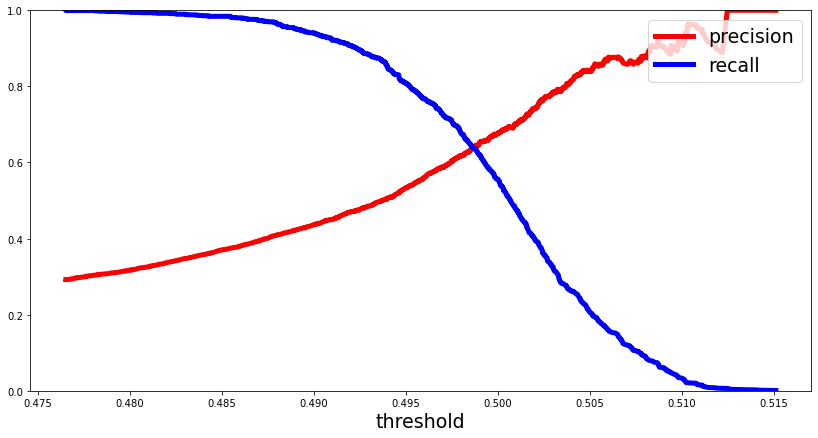

In [139]:
from sklearn.metrics import precision_recall_curve

# getting the probabilities of our predictions
y_scores = ad.predict_proba(x_train)
y_scores = y_scores[:,1]

precision, recall, threshold = precision_recall_curve(y_train, y_scores)
def plot_precision_and_recall(precision, recall, threshold):
    plt.plot(threshold, precision[:-1], "r-", label="precision", linewidth=5)
    plt.plot(threshold, recall[:-1], "b", label="recall", linewidth=5)
    plt.xlabel("threshold", fontsize=19)
    plt.legend(loc="upper right", fontsize=19)
    plt.ylim([0, 1])

plt.figure(figsize=(14, 7))
plot_precision_and_recall(precision, recall, threshold)
plt.show()

You are now able to choose a threshold, that gives you the best precision/recall tradeoff for your current machine learning problem. If you want for example a precision of 80%, you can easily look at the plots and see that you would need a threshold of around 0.4. Then you could train a model with exactly that threshold and would get the desired accuracy.

Another way is to plot the precision and recall against each other:

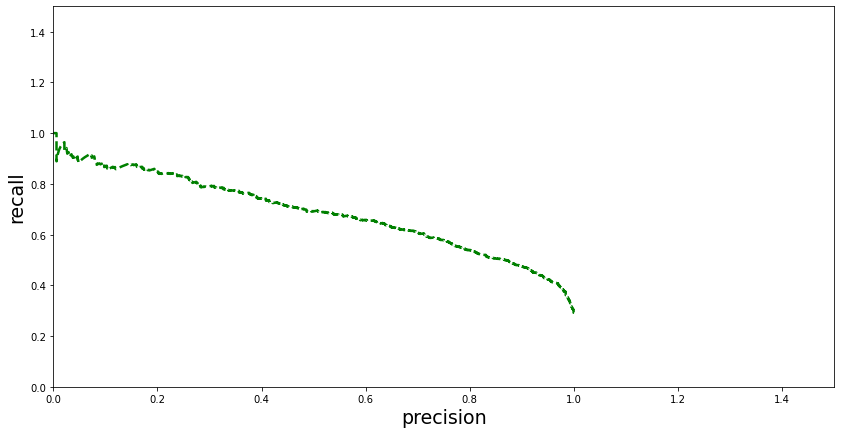

In [140]:
def plot_precision_vs_recall(precision, recall):
    plt.plot(recall, precision, "g--", linewidth=2.5)
    plt.ylabel("recall", fontsize=19)
    plt.xlabel("precision", fontsize=19)
    plt.axis([0, 1.5, 0, 1.5])

plt.figure(figsize=(14, 7))
plot_precision_vs_recall(precision, recall)
plt.show()

# ROC AUC Curve

Another way to evaluate and compare your binary classifier is provided by the ROC AUC Curve. This curve plots the true positive rate (also called recall) against the false positive rate (ratio of incorrectly classified negative instances), instead of plotting the precision versus the recall.


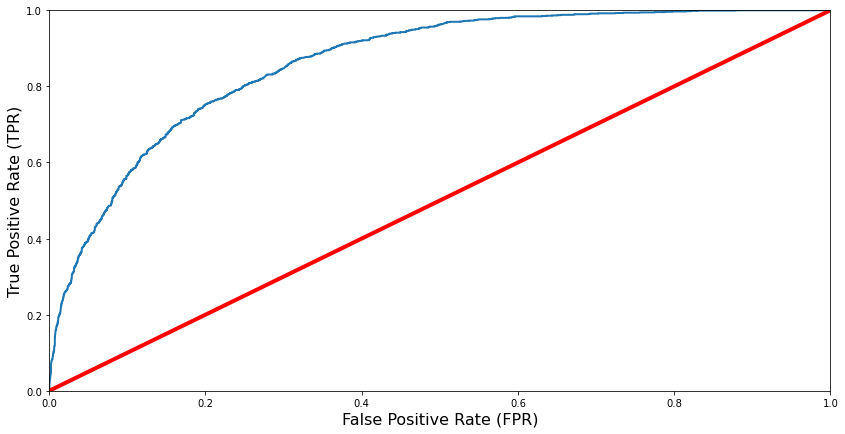

In [141]:
from sklearn.metrics import roc_curve
# compute true positive rate and false positive rate
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, y_scores)
# plotting them against each other
def plot_roc_curve(false_positive_rate, true_positive_rate, label=None):
    plt.plot(false_positive_rate, true_positive_rate, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'r', linewidth=4)
    plt.axis([0, 1, 0, 1])
    plt.xlabel('False Positive Rate (FPR)', fontsize=16)
    plt.ylabel('True Positive Rate (TPR)', fontsize=16)

plt.figure(figsize=(14, 7))
plot_roc_curve(false_positive_rate, true_positive_rate)
plt.show()

The red line in the middel represents a purely ada boost classifier (e.g a coin flip) and therefore your classifier should be as far away from it as possible. Our ada boost classifier model seems to do a good job.

Of course we also have a tradeoff here, because the classifier produces more false positives, the higher the true positive rate is.

# ROC AUC Score

The ROC AUC Score is the corresponding score to the ROC AUC Curve. It is simply computed by measuring the area under the curve, which is called AUC.

In [142]:
from sklearn.metrics import roc_auc_score
r_a_score = roc_auc_score(y_train, y_scores)
print("ROC-AUC-Score:", r_a_score)

ROC-AUC-Score: 0.8627133951141971


# Saving the model

In [143]:
import pickle
filename='Census Income.pkl'
pickle.dump(svc,open(filename,'wb'))

# conclusion

In [144]:
loaded_model=pickle.load(open('Census Income.pkl','rb'))
result=loaded_model.score(x_test,y_test)
print(result)

0.796989247311828


In [145]:
conclusion=pd.DataFrame([loaded_model.predict(x_test)[:],pred[:]],index=["predicted","original"])

In [146]:
conclusion

,0,1,2,3,4,5,6,7,8,9,...,2315,2316,2317,2318,2319,2320,2321,2322,2323,2324
predicted,0,0,0,0,0,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
original,0,0,0,0,0,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
